In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
bitcoin = pd.read_csv('C:/Users/skymy/Desktop/bigData-main/빅데이터 포트폴리오/데이터 모음/bitcoin_market_price.csv')

In [3]:
bitcoin.head()

,Timestamp,market-price
0,2021-03-22 00:00:00,57411.17
1,2021-03-23 00:00:00,54204.96
2,2021-03-24 00:00:00,54477.46
3,2021-03-25 00:00:00,52508.23
4,2021-03-26 00:00:00,51415.92


In [4]:
bitcoin.tail()

,Timestamp,market-price
361,2022-03-18 00:00:00,40946.78
362,2022-03-19 00:00:00,41795.77
363,2022-03-20 00:00:00,42222.32
364,2022-03-21 00:00:00,41250.83
365,2022-03-22 00:00:00,41071.41


In [5]:
bitcoin.shape

(366, 2)

In [6]:
bitcoin_train = bitcoin.iloc[:366]

In [7]:
bitcoin_train.tail()

,Timestamp,market-price
361,2022-03-18 00:00:00,40946.78
362,2022-03-19 00:00:00,41795.77
363,2022-03-20 00:00:00,42222.32
364,2022-03-21 00:00:00,41250.83
365,2022-03-22 00:00:00,41071.41


In [8]:
bitcoin_train.columns = ['day', 'price_USD']

In [9]:
bitcoin_train.head()

,day,price_USD
0,2021-03-22 00:00:00,57411.17
1,2021-03-23 00:00:00,54204.96
2,2021-03-24 00:00:00,54477.46
3,2021-03-25 00:00:00,52508.23
4,2021-03-26 00:00:00,51415.92


In [10]:
bitcoin_train['day'] = pd.to_datetime(bitcoin_train['day'])

In [11]:
bitcoin_train.index = bitcoin_train['day']
bitcoin_train.set_index('day', inplace=True)
bitcoin_train.head()

,price_USD
day,
2021-03-22,57411.17
2021-03-23,54204.96
2021-03-24,54477.46
2021-03-25,52508.23
2021-03-26,51415.92


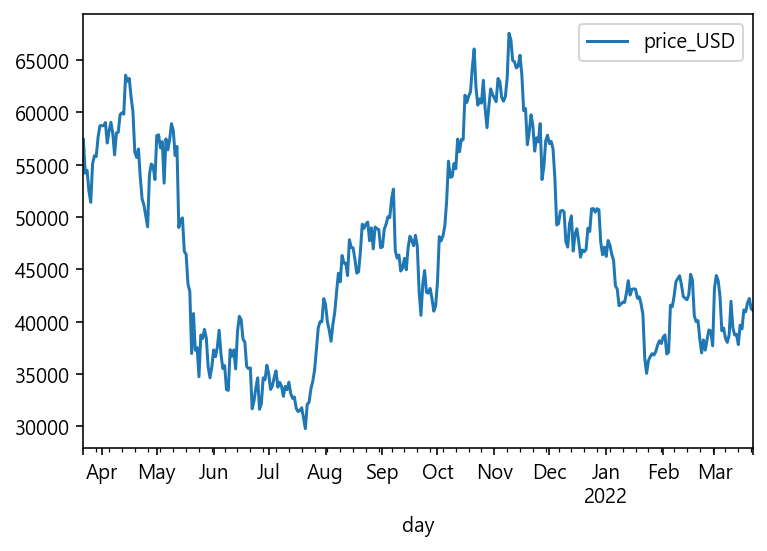

In [12]:
bitcoin_train.plot()
plt.show()

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(bitcoin_train.price_USD.values, order = (2,1,2))

In [14]:
model_fit = model.fit(trend = 'c', full_output = True, disp = True)

In [15]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3247.115
Method:                       css-mle   S.D. of innovations           1763.188
Date:                Tue, 22 Mar 2022   AIC                           6506.230
Time:                        22:49:38   BIC                           6529.629
Sample:                             1   HQIC                          6515.529
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.3673     90.869     -0.499      0.618    -223.467     132.732
ar.L1.D.y      0.6536      0.024     27.553      0.000       0.607       0.700
ar.L2.D.y     -0.9693      0.023    -42.445      0.0

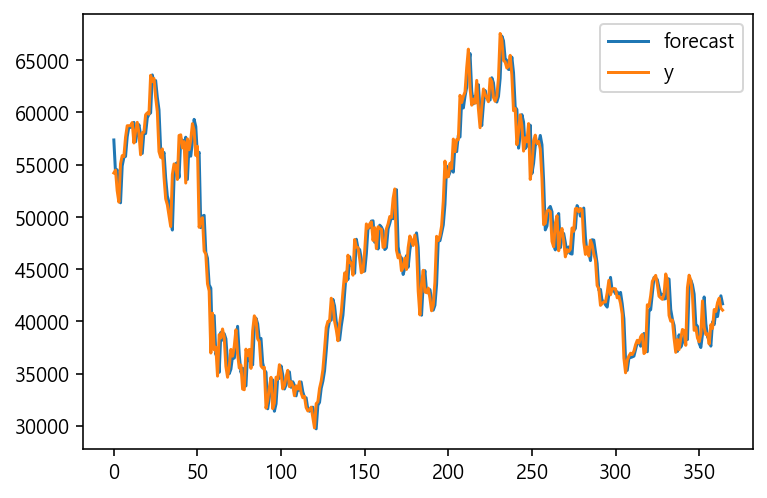

In [16]:
fig = model_fit.plot_predict()

<AxesSubplot:>

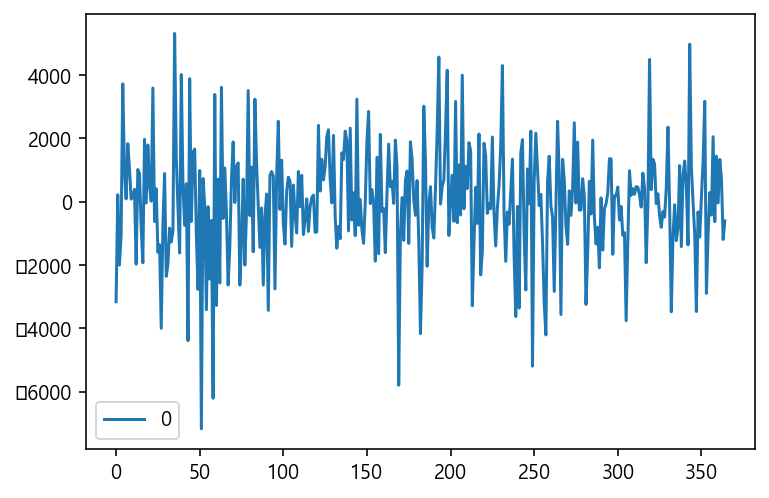

In [17]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [18]:
forecast_data = model_fit.forecast(steps=5)
bitcoin_test = bitcoin_train[361:]

In [19]:
bitcoin_test

,price_USD
day,
2022-03-18,40946.78
2022-03-19,41795.77
2022-03-20,42222.32
2022-03-21,41250.83
2022-03-22,41071.41


In [20]:
# 마지막 5일의 예측 데이터 (2022-03-18 ~ 2022-03-22)
pred_y = forecast_data[0].tolist()
# 실제 5일의 데이터 (2022-03-18 ~ 2022-03-22)
test_y = bitcoin_test.price_USD.values

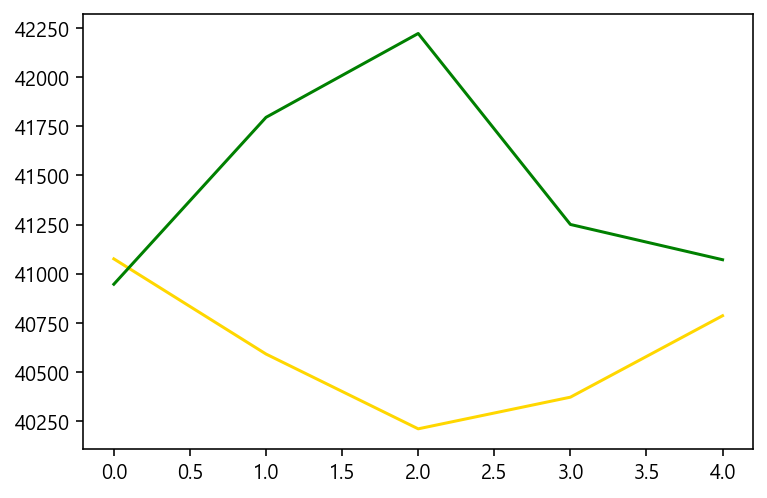

In [21]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')
# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [22]:
from fbprophet import Prophet

In [23]:
bitcoin.head()

,Timestamp,market-price
0,2021-03-22 00:00:00,57411.17
1,2021-03-23 00:00:00,54204.96
2,2021-03-24 00:00:00,54477.46
3,2021-03-25 00:00:00,52508.23
4,2021-03-26 00:00:00,51415.92


In [24]:
bitcoin.columns = ['ds', 'y']
bitcoin.head()

,ds,y
0,2021-03-22 00:00:00,57411.17
1,2021-03-23 00:00:00,54204.96
2,2021-03-24 00:00:00,54477.46
3,2021-03-25 00:00:00,52508.23
4,2021-03-26 00:00:00,51415.92


In [26]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin)

In [28]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
366,2022-03-23,41233.785358
367,2022-03-24,41221.730046
368,2022-03-25,41007.318891
369,2022-03-26,41161.038979
370,2022-03-27,41224.779229


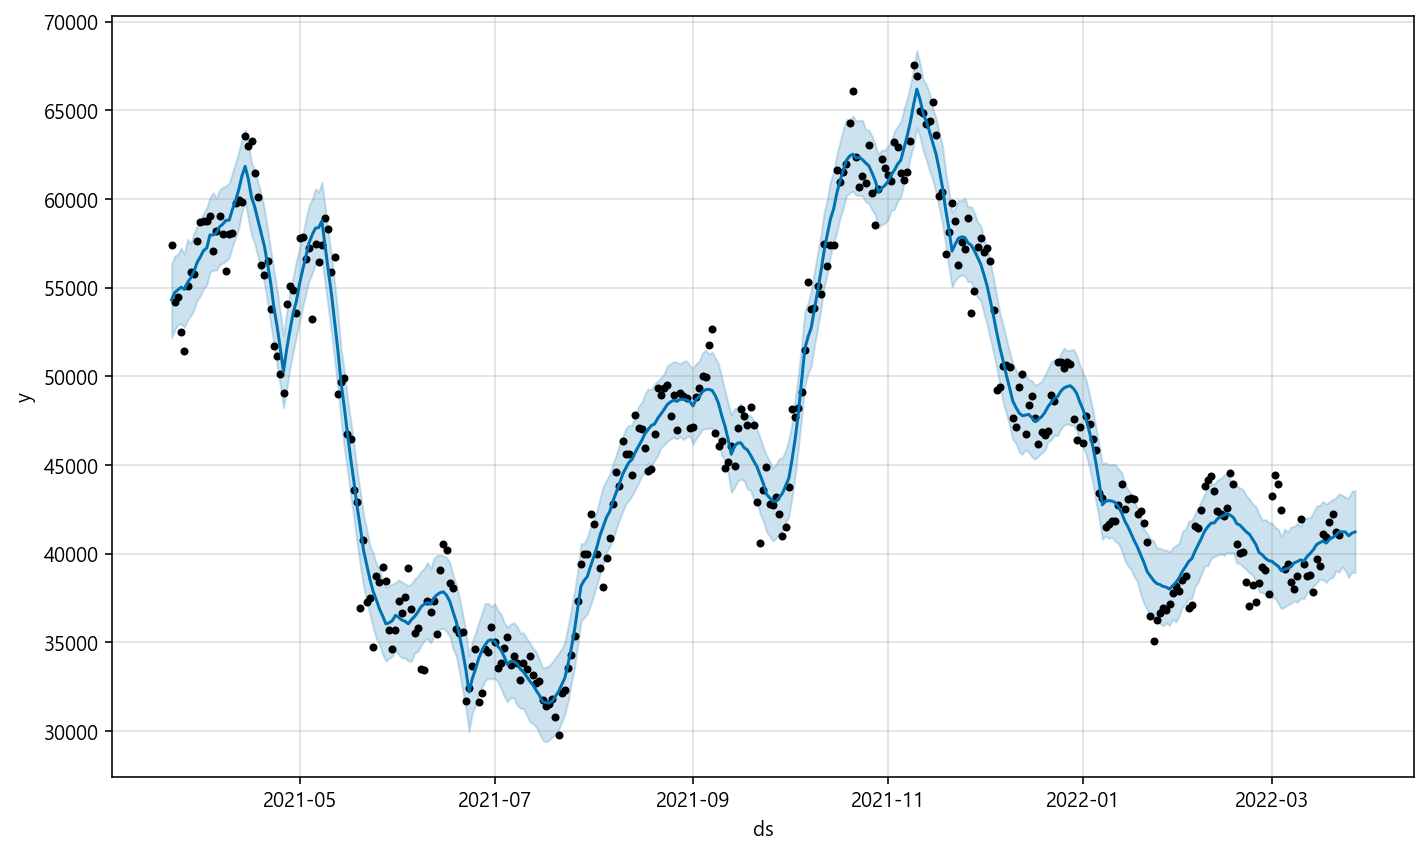

In [29]:
fig1 = prophet.plot(forecast_data)

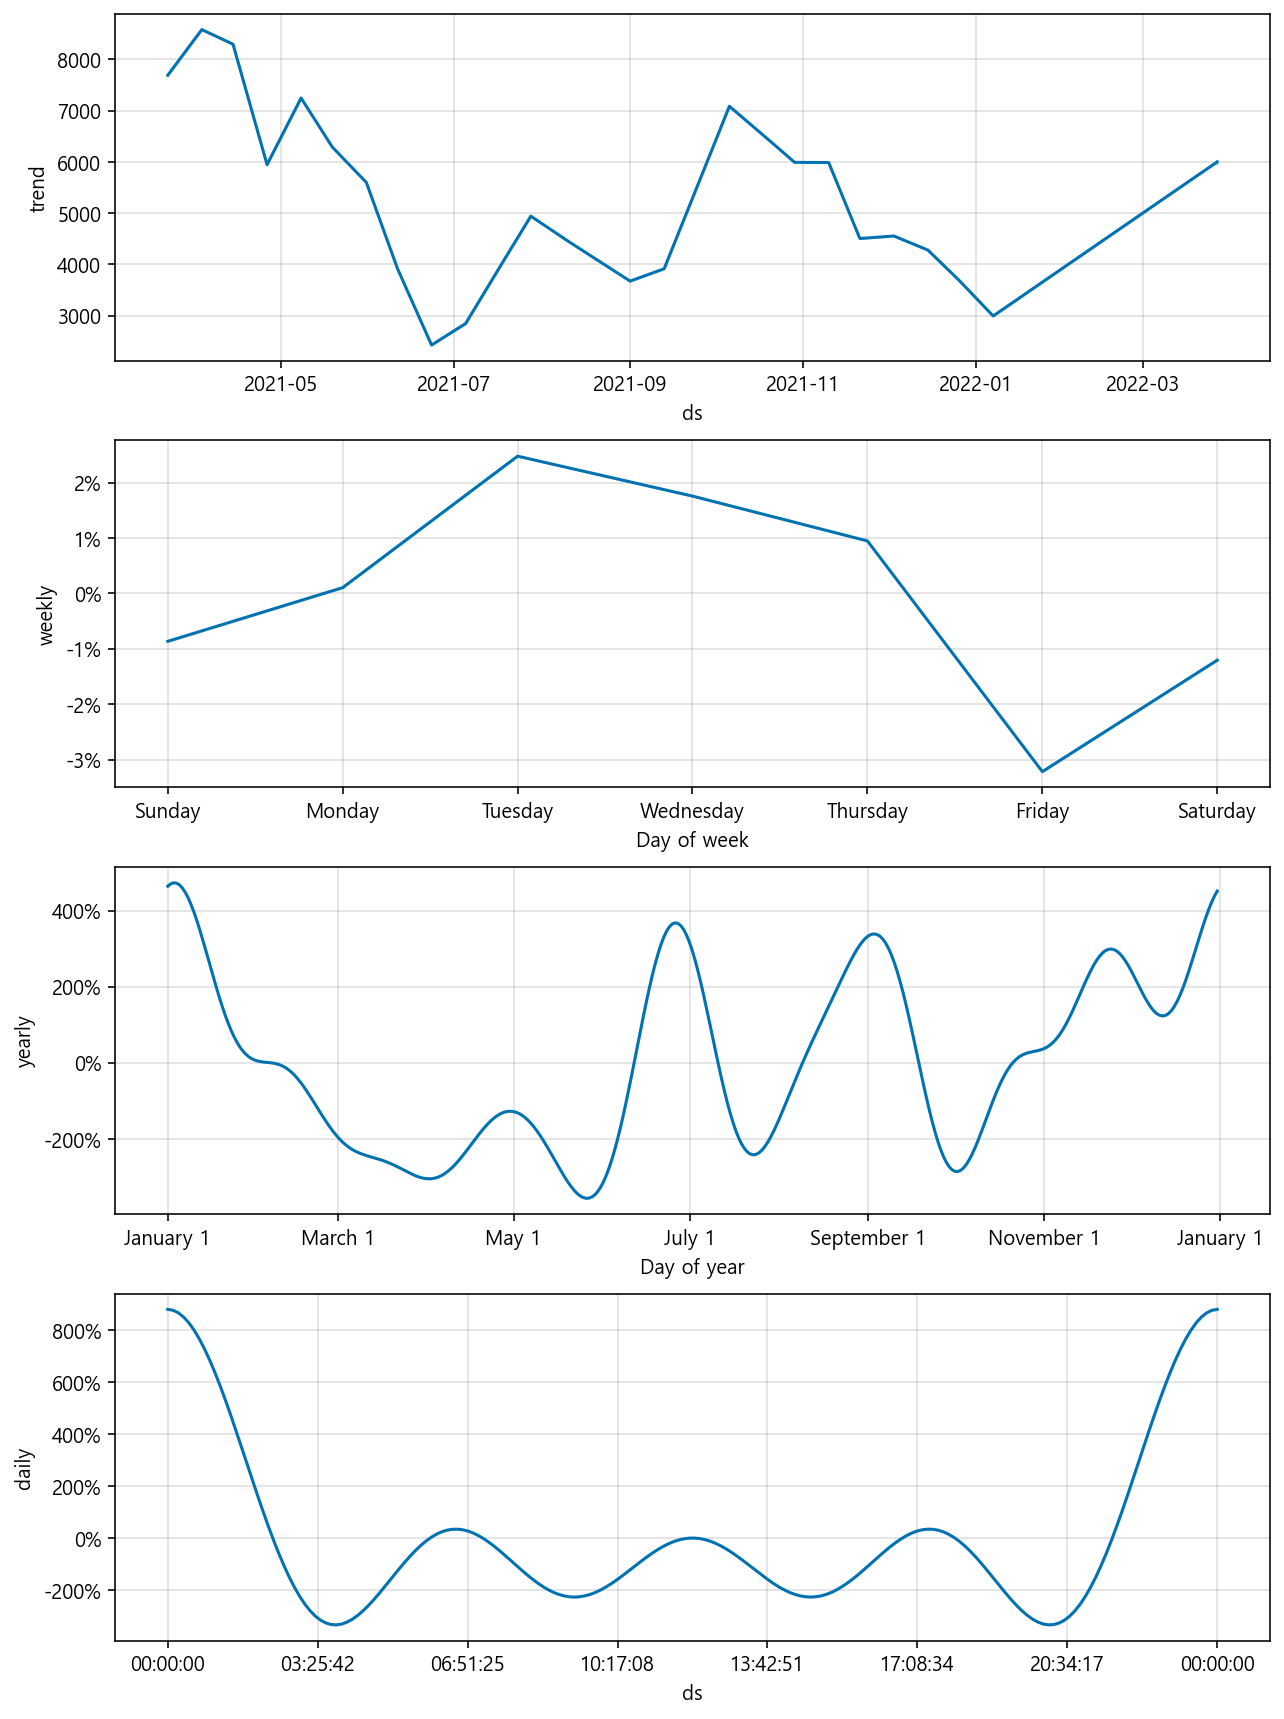

In [30]:
fig2 = prophet.plot_components(forecast_data)

In [55]:
bitcoin_test = bitcoin[361:]
# 마지막 5일의 예측 데이터 (2022-03-18 ~ 2022-03-22)
pred_y = forecast_data.yhat.values[-10:-5]
# 실제 5일의 데이터 (2022-03-18 ~ 2022-03-22)
test_y = bitcoin_test.y.values

In [56]:
bitcoin_test.head()

,ds,y
361,2022-03-18 00:00:00,40946.78
362,2022-03-19 00:00:00,41795.77
363,2022-03-20 00:00:00,42222.32
364,2022-03-21 00:00:00,41250.83
365,2022-03-22 00:00:00,41071.41


In [57]:
print(pred_y)

[40597.45306291 40812.57876558 40916.30452676 41040.40496623
 41232.45624142]


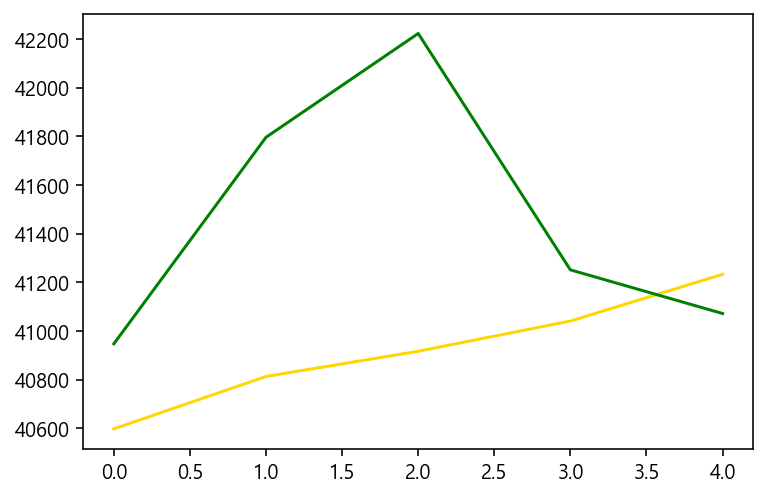

In [58]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')
# 실제 가격 그래프
plt.plot(test_y, color = 'green')